In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **Libraries:**

In [8]:
# Library
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler,MultiLabelBinarizer

# Load the Data:

# Training Data:

In [9]:
# To load the training data 
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
train_df = pd.DataFrame(train)
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [10]:
# shape of the training data
train_df.shape

(20000, 22)

In [11]:
# Information on training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

**There are 13 object (categorical) and 9 float(Numerical) data.**

In [12]:
# unique values of the training data:
train_df.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

# Insights:
***Area ID and Area_Name, Premise_code and Premise_Description, weapon_used_code and weapon_Description, status and status_Description denotes the same number so we could eliminate one column among each category. Out of 17,259 modus operandi feature has 10,489 unique sequence of crime so the remaining 50% is repeating sequence of the crime already commited hence it could have strong correlation with the target variable. Victim Age total unique value is 100 hence all age category is affected in the crime. Date Ocuurred and date reported represents its a one year data and maximum it takes 2 3/4 years to report for the crime.unique count of Reporting District number represent the total no of districts the police station is located.***

In [13]:
train_df['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

***Modus_Operandi has null values hence we have to impute the null values later in the code.***

#  Testing Data:

In [14]:
# Loading testing data:
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
test_df = pd.DataFrame(test)

test_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


# Descriptive Statistics:

## Numerical Data:

In [15]:
train_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


***In Description statistics of the dataset the numerical data and mean of latitude and longitude explains The Crime activity occurs in the same city Los Angels califonia USA.(since the standard deviation is 2 it is occuring in same city). The Average Victim Age is 30 and Average time the crime occurred is in the afternoon 1.52 pm. Mode of Weapon used code is 400(represent force). Hence most of the criminal use Force to attack people.The median for the part1-2 is 1 hence there is a central tendency of more serious crime are occurred in the city LA.***

## Categorical Data:

In [16]:
train_df.describe(include = ['object'])

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,826,8538,6143,5033,3990,15236,15236,11666


***On new year there were more crime occurred. 77th street area has high frequency of crime. Modus operandi of 0344 means Removes vict property is occurred more.(hence more number of property crime could be present). More males are affected. The place where is crime occurs is 25% on the streets. And more than 75% are in status IC(Investigation continues).
More than 58% case is Property crime.***

## Missing Values:

In [17]:
# checking if training data contains null/NA/missing values:
train_df.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [18]:
(train_df == ' ').sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

In [19]:
(train_df.isin(['NA', 'N/A', '-'])).sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

In [20]:
train_df.isna().sum() * 100 /train_df.shape[0]

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

***82% values in cross street is missing so we could remove this feature on further analysis. 13% modus operandi could be imputed with the most frequent usage of attack code which is 0344 or 0000. and 63% weapon code is not given wee could subsitute with the mode 400.(using force) or could drop the feature.***

# EDA(Exploratory Data Analysis):

* Visualizing

* Correlation

* Experiment with Attribute Combination

**Analyse on ReportingDistrict**

In [21]:
# Reporting district unique value count:
ReportingDisCount = train_df['Reporting_District_no'].value_counts()
ReportingDisCount

Reporting_District_no
645.0     99
162.0     85
1494.0    74
1822.0    72
182.0     72
          ..
452.0      1
871.0      1
1476.0     1
848.0      1
812.0      1
Name: count, Length: 1120, dtype: int64

In [22]:
# District which has more than 60 cases:
countDisReportinggreater = ReportingDisCount[ReportingDisCount > 60]
countDisReportinggreater

Reporting_District_no
645.0     99
162.0     85
1494.0    74
1822.0    72
182.0     72
1431.0    69
363.0     69
1239.0    69
111.0     68
1802.0    67
647.0     64
666.0     62
646.0     62
636.0     62
1268.0    62
1267.0    62
1555.0    61
Name: count, dtype: int64

***More than 60 crimes are being reported in these district numbers. So there could be more population in these district or more poverty or illeteracy. check for correlation between same type of crime reported in the top Reported district.***

In [23]:
# arrangement of district according to the crime count:
sorted_districts = countDisReportinggreater.index
sorted_districts

Index([ 645.0,  162.0, 1494.0, 1822.0,  182.0, 1431.0,  363.0, 1239.0,  111.0,
       1802.0,  647.0,  666.0,  646.0,  636.0, 1268.0, 1267.0, 1555.0],
      dtype='float64', name='Reporting_District_no')

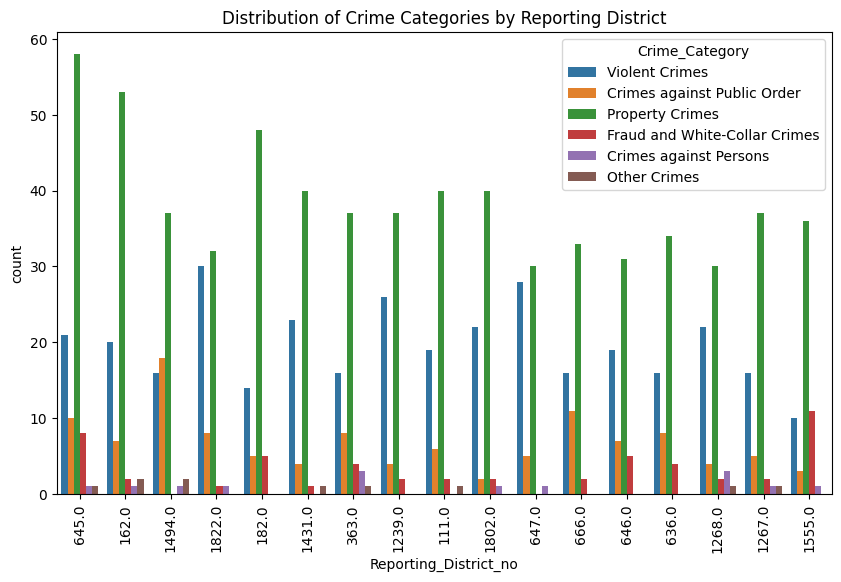

In [24]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Reporting_District_no',hue='Crime_Category', data=train_df[train_df['Reporting_District_no'].isin(countDisReportinggreater.index)],order=sorted_districts)
plt.title('Distribution of Crime Categories by Reporting District')
plt.xticks(rotation=90)
plt.show()


***There are district which has no crime reported in Fraud and white collar crime category like 1494 and 647. Other Crime categories are in few district. When the property crime is less we could see equal rise in other category crime. In 1822 we could see major 2 types of crime occur. so reporting district seems to be important feature in categorizing the crime.***


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

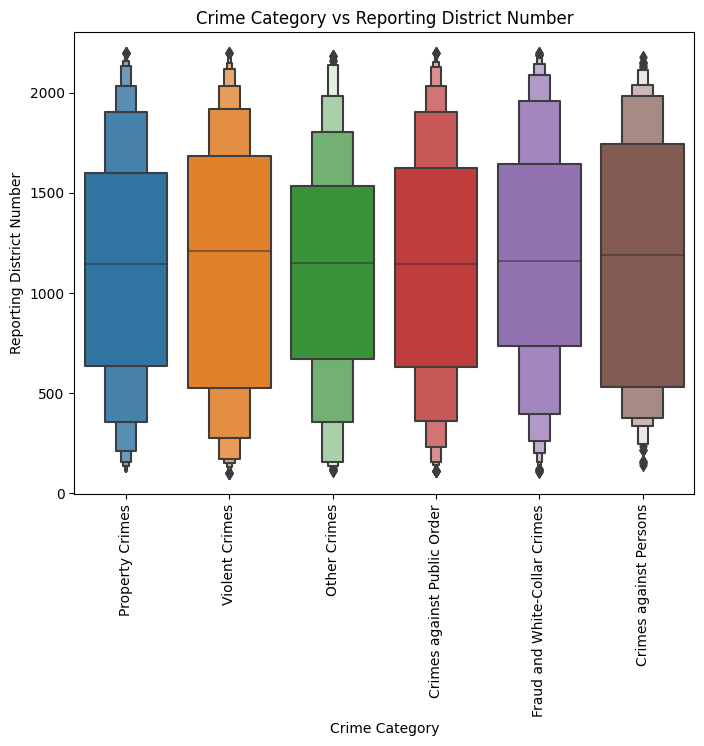

In [25]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Crime_Category', y='Reporting_District_no', data=train_df)
plt.title('Crime Category vs Reporting District Number')
plt.xlabel('Crime Category')
plt.ylabel('Reporting District Number')
plt.xticks(rotation=90)
plt.show()

In [26]:
report = (train_df['Reporting_District_no'] > 1000.00) & (train_df['Reporting_District_no'] < 2200.00)

# Apply the filter to reporting district number:
repcount= report.value_counts()*100/len(train_df)
repcount

Reporting_District_no
True     56.935
False    43.065
Name: count, dtype: float64

***Nearly 56% are reported in the district_No less than 1000 and 43% are reported in the district no >1000.***

**Analyse on Area_Name:**

In [27]:
# unique value and its count for Area Name feature:
train_df['Area_Name'].value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

In [28]:
areacountgreater = train_df['Area_Name'].value_counts()[train_df['Area_Name'].value_counts() > 1000]
areacountgreater

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Name: count, dtype: int64

***These represent the area name where crime reported is more than 1000***

In [29]:
sort_area = areacountgreater.index

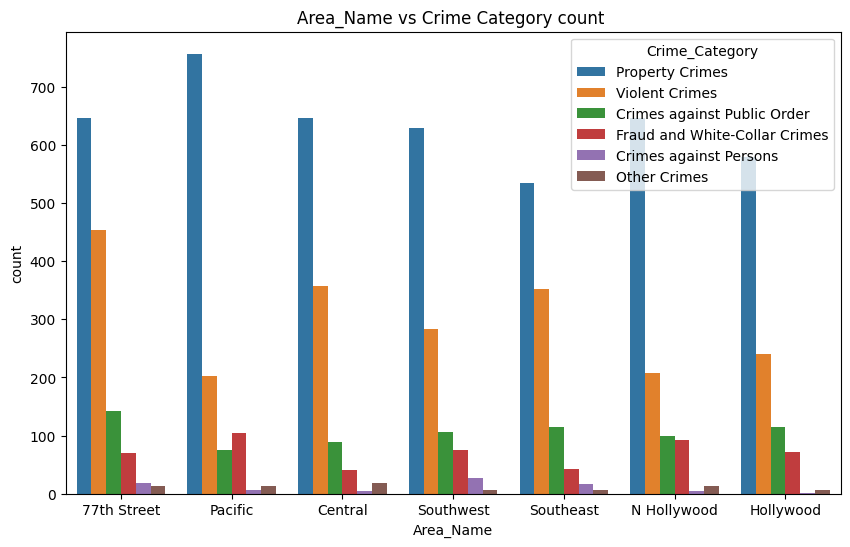

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Area_Name', hue='Crime_Category', data=train_df[train_df['Area_Name'].isin(areacountgreater.index)],order=sort_area)
plt.title('Area_Name vs Crime Category count ')
plt.show()

***Area ID or Area_Name similar pattern is observed in all area.***

### Insights
***On New Year the no of crime is higher 137. On the top 7 Area the number of crime is above 1000. Are these area related to the crime type?***

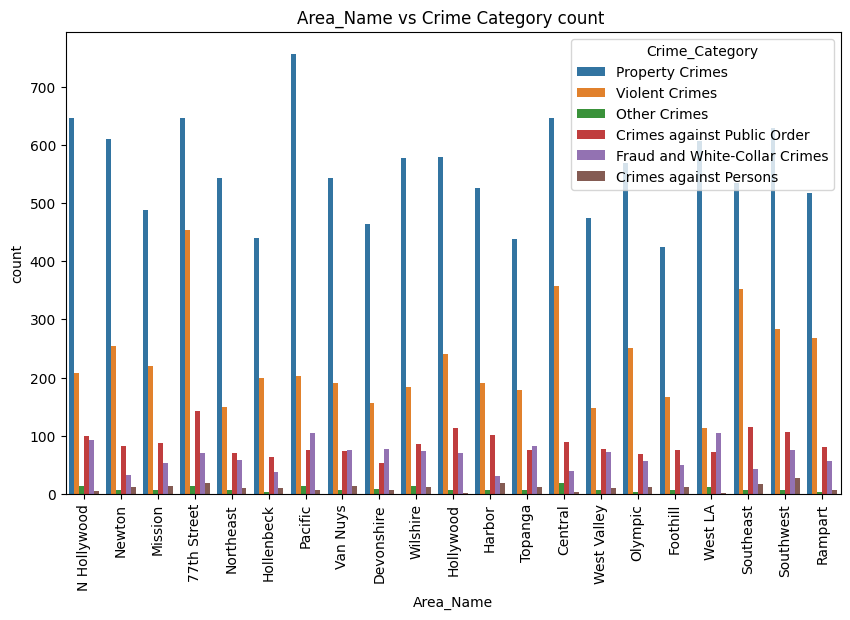

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Area_Name', hue='Crime_Category', data=train_df)
plt.xticks(rotation=90)
plt.title('Area_Name vs Crime Category count ')
plt.show()

***The property crime is more prevalant in all areas..where as violent crimes are seen in more in 5-8 areas. Crime against person is more in southwest area compared to other area and it is nearly zero in westLA and Hollywood.***

**TARGET VARIABLE**

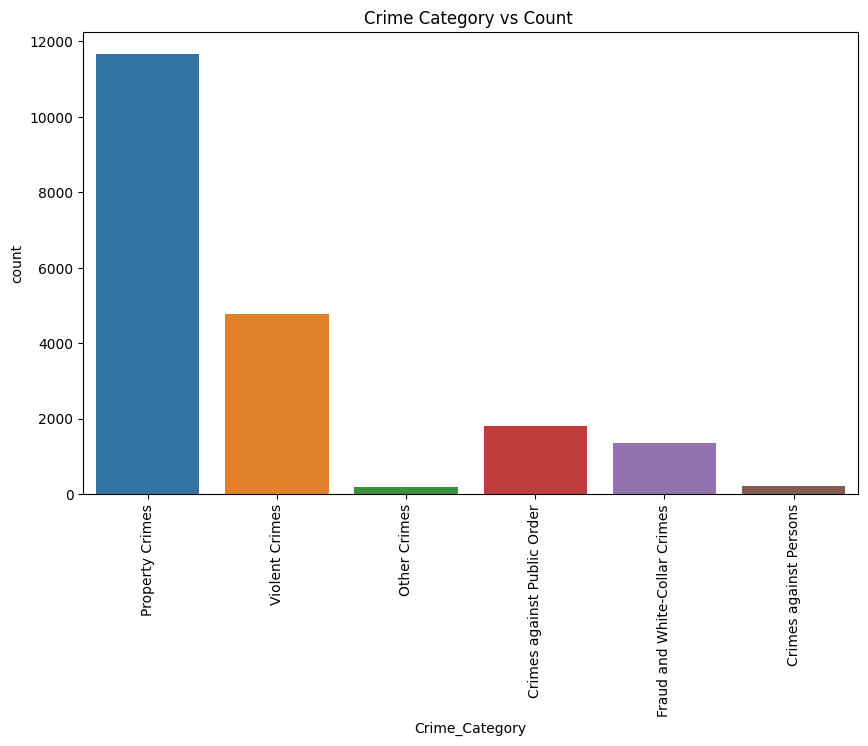

In [32]:
# target feature spread:
from itertools import count
plt.figure(figsize=(10, 6))
crimerate = train_df['Crime_Category'].value_counts()
sns.countplot(x='Crime_Category', data=train_df)
plt.xticks(rotation=90)
plt.title('Crime Category vs Count ')
plt.show()

In [33]:
# numerical features:
numerical_features = train_df.select_dtypes(include = ['float64'])
numerical_features

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,NaN
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,NaN
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,NaN
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.0
...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,NaN
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,NaN
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,NaN


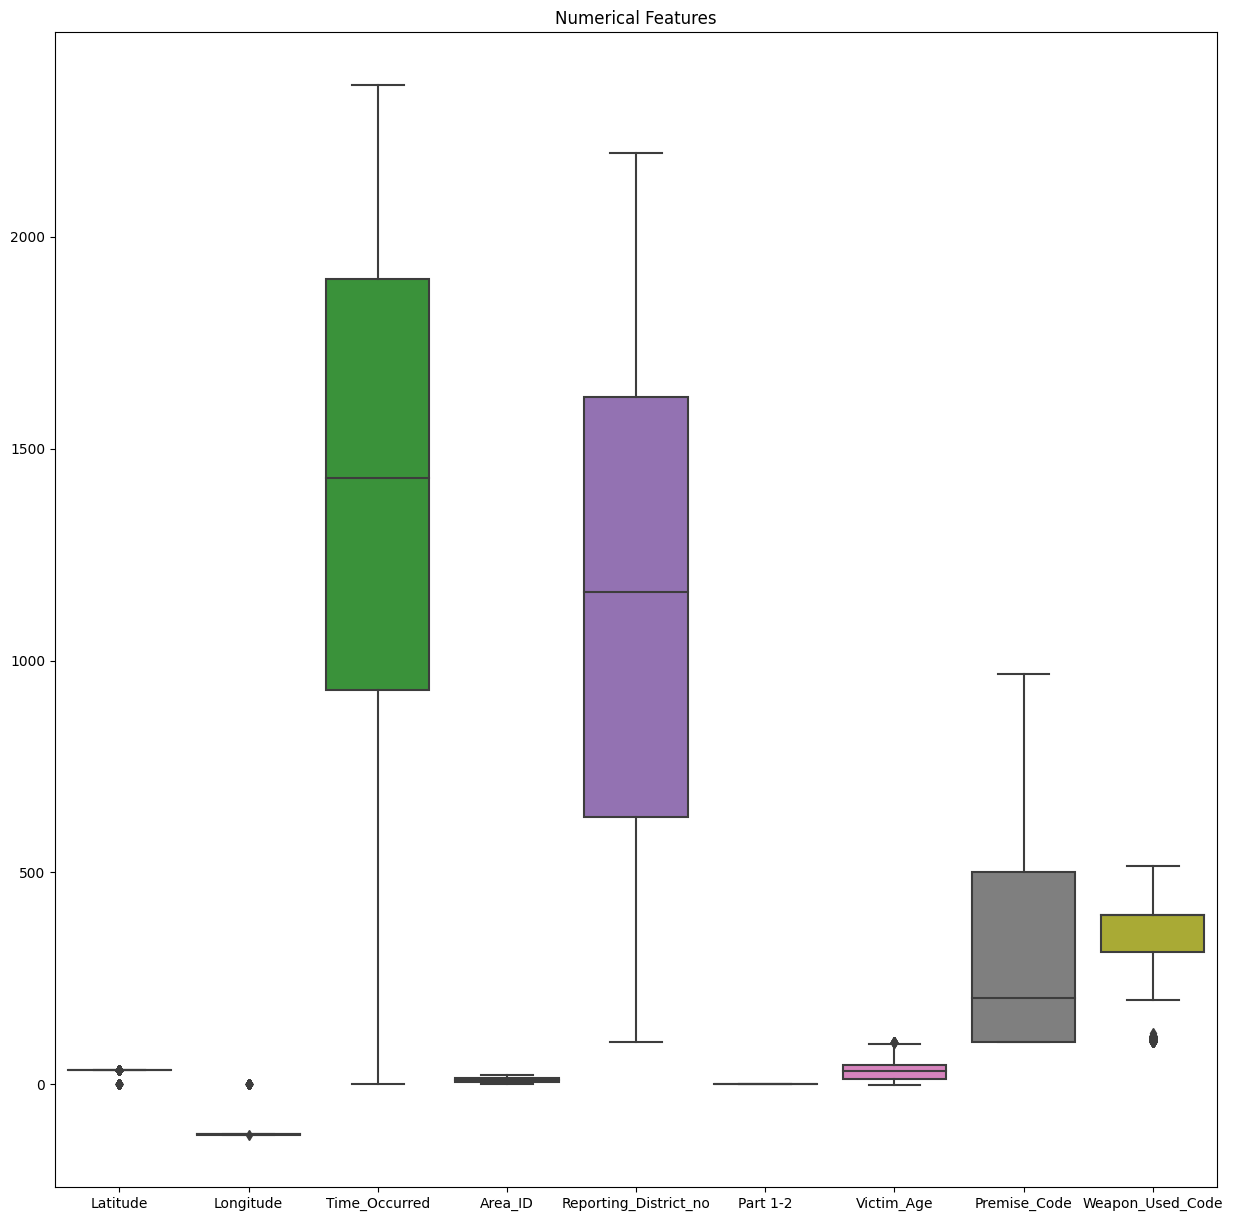

In [34]:
# graph for the spread of numerical feature 
plt.figure(figsize=(15,15))
sns.boxplot(numerical_features)
plt.title('Numerical Features')
plt.show()

***There are outliers or irrelavant data in Latitude Longitude victim age, Weapon_Used_code.***

#### Correlation:

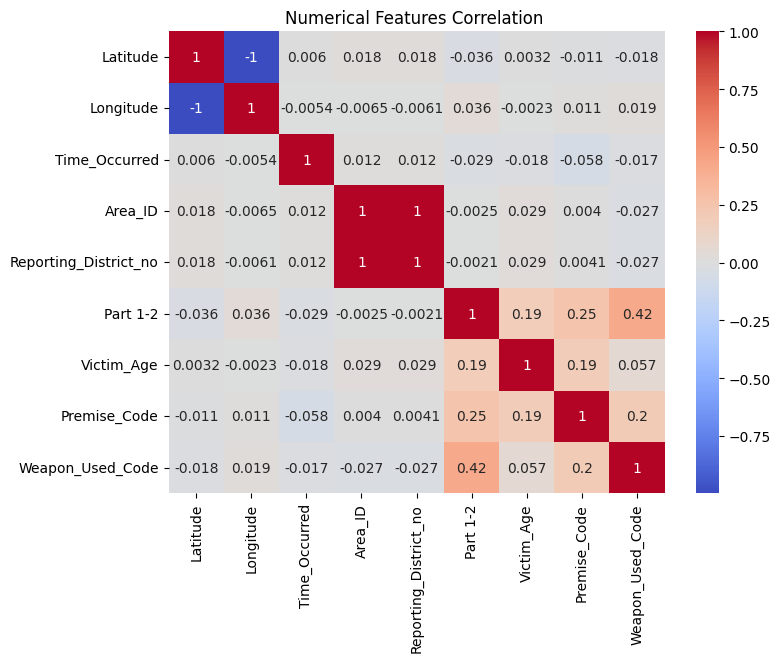

In [35]:
# correlation of numerical features:
plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.title('Numerical Features Correlation ')
plt.show()

***There is total correlation between Area_ID and Reporting_District_No hence the crime incident is reported to the corresponding district hence one column could be taken for analysis. Weapon Used Code is fairly correlated with part 1-2 crime. i.e serious or non-serious crime. Premise code which represent the place of crime is correlated with the seriousness of the crime.***

In [36]:
# Label Values:
train_df["Crime_Category"].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

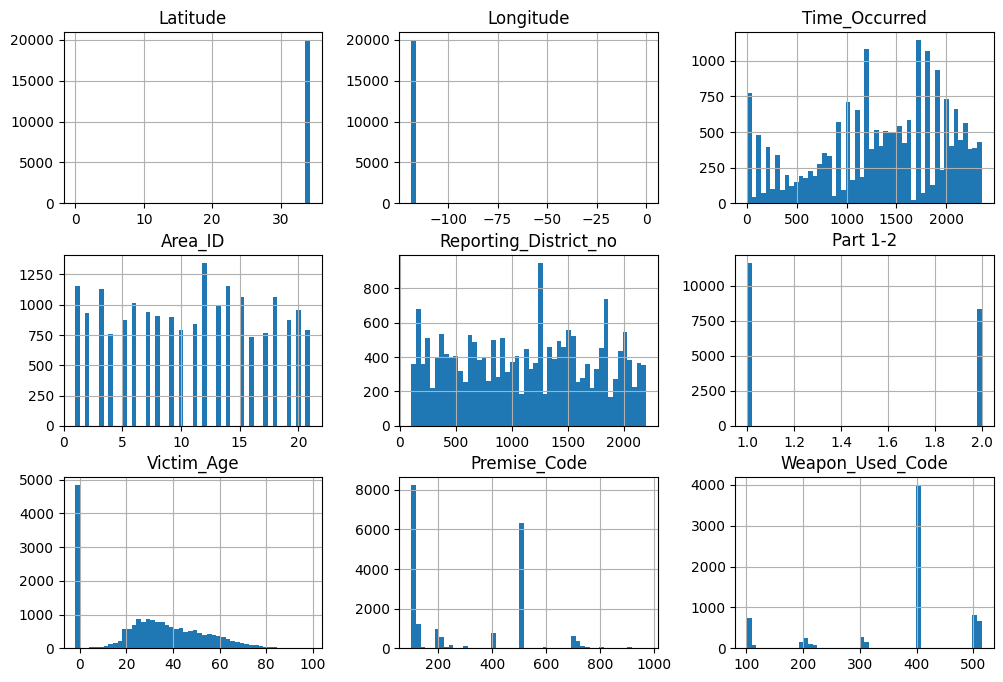

In [37]:
import matplotlib.pyplot as plt
train_df.hist(bins=50,figsize=(12,8))
plt.show()


*** fig 1 and 2 The Same Latitude and Longitude shows the event is occuring in the same city LA. The Part 1 crime i.e. Serious Crimes are more than Non Series Crime(Part2). The Victim Age is right screwed and maximum victim age range is 20-40. The premise_code shows that more number of crimes is reported to occur in streets. The high weapon code is the force(400) that is used to attack people.***

***The box plot shows the latitude and longitude has zero values. In Time Occurred  it is again confirming that most crime occur at afternoon time since median line 50% line is around 1300.The Victim Age has outlier and weapon use code has outlier.***

In [38]:
# part1 part 2 counts:
train_df["Part 1-2"].value_counts()

Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64

***Hence more than 58% of the crime is part 1 crime in Los Angels city. and part crime is correlated with weapon used.***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

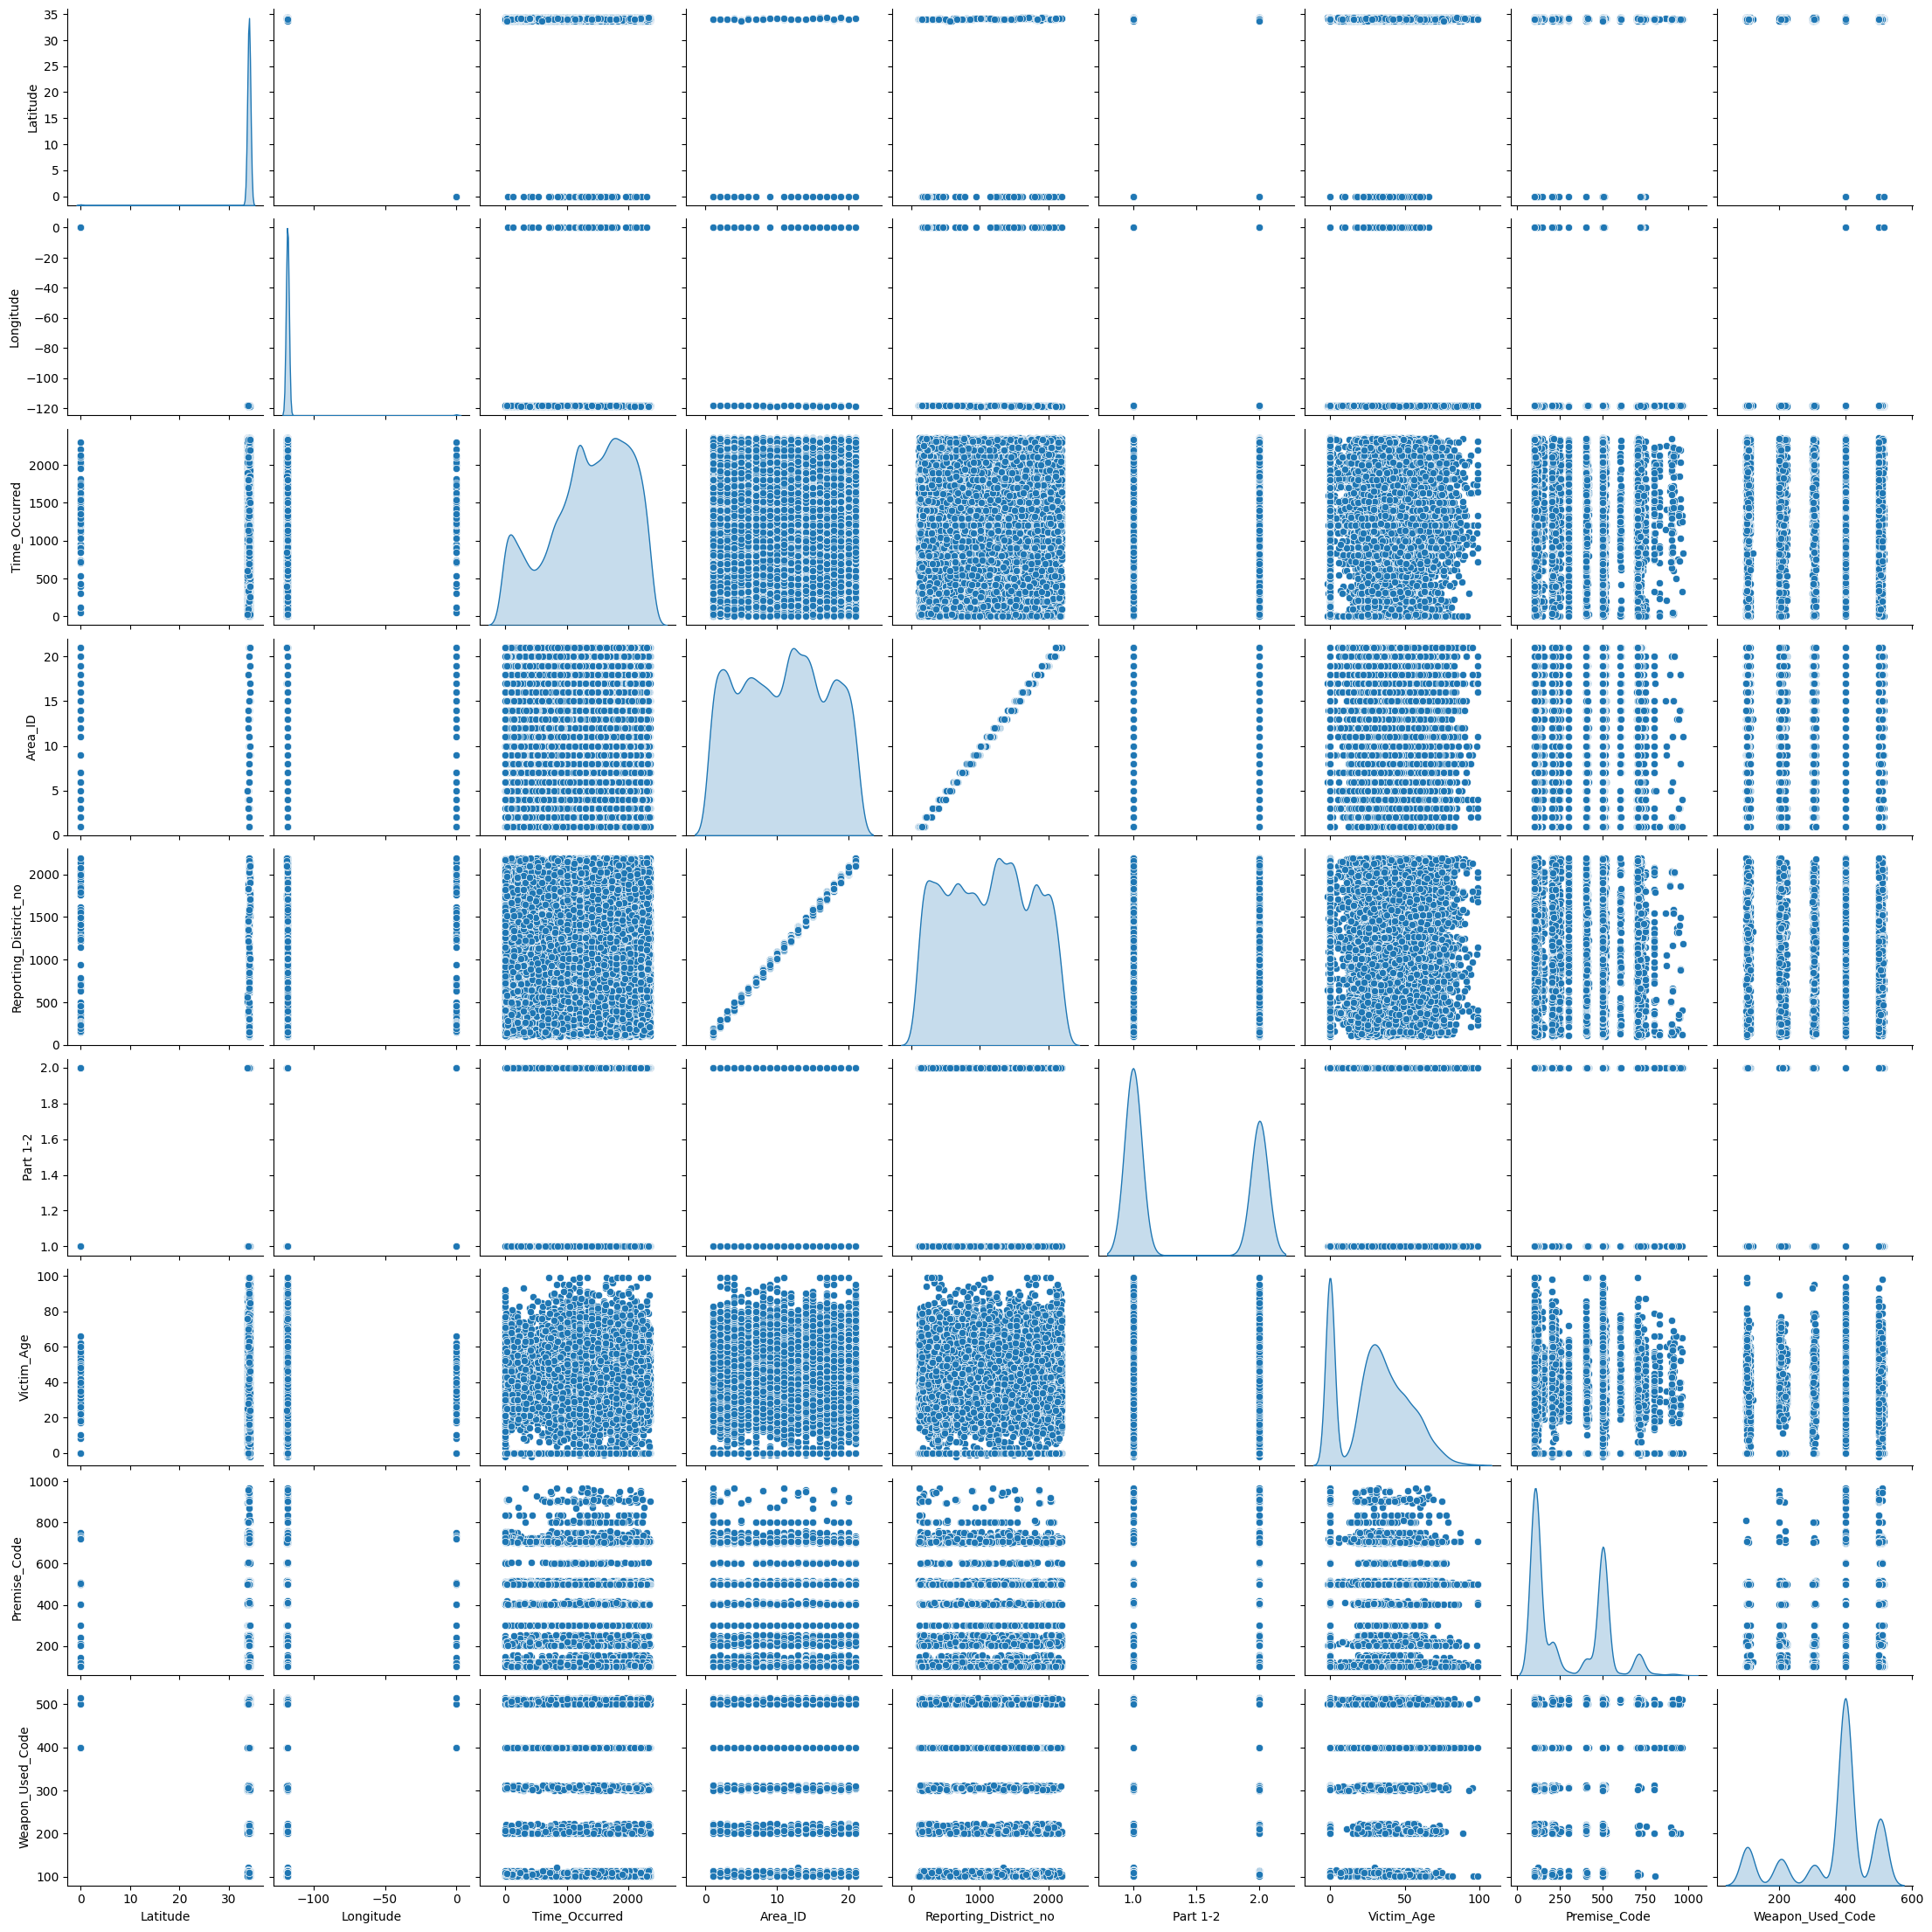

In [39]:
sns.pairplot(numerical_features, diag_kind = 'kde')
plt.show()

In [40]:
#numerical columns seperating
num_cols = train_df.select_dtypes(exclude=["object"]).columns
num_cols

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')

In [41]:
#correlation
train_df[num_cols].corr()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
Latitude,1.000000,-0.998910,0.005952,0.018411,0.017928,-0.036357,0.003195,-0.011293,-0.017656
Longitude,-0.998910,1.000000,-0.005361,-0.006480,-0.006139,0.036373,-0.002252,0.011205,0.019185
Time_Occurred,0.005952,-0.005361,1.000000,0.012346,0.012127,-0.028881,-0.017798,-0.057534,-0.016911
Area_ID,0.018411,-0.006480,0.012346,1.000000,0.999024,-0.002518,0.028966,0.004045,-0.027243
Reporting_District_no,0.017928,-0.006139,0.012127,0.999024,1.000000,-0.002108,0.028721,0.004121,-0.027117
Part 1-2,-0.036357,0.036373,-0.028881,-0.002518,-0.002108,1.000000,0.186780,0.254579,0.419642
Victim_Age,0.003195,-0.002252,-0.017798,0.028966,0.028721,0.186780,1.000000,0.191313,0.056768
Premise_Code,-0.011293,0.011205,-0.057534,0.004045,0.004121,0.254579,0.191313,1.000000,0.196771
Weapon_Used_Code,-0.017656,0.019185,-0.016911,-0.027243,-0.027117,0.419642,0.056768,0.196771,1.000000


***Since Area_ID and Reporting_District_No is highly correlated we could take any one column. Part 1 type of crime:(Serious Crime) murder, rape, aggravated assault, robbery, burglary, larceny, motor vehicle theft, arson, human trafficking – commercial sex acts, and human trafficking – involuntary servitude. Part 2 type of crime:(Less Serious Crime): Forgery and Counterfeiting,Fraud,Embezzlement,Stolen Property,Vandalism,Curfew and Loitering Law Violation (Juvenile),Offenses Against Family and Children,Gambling,Drug Abuse Violation etc. So Part 1 crime mostly comprises of Crime against person, Crime Against Public Order,Property Crime and Violet Crime. Part 1 Crime doesnot include white collar crime and other crime. Part 2 includes all type of crime.***

## Categorical Variable:

In [42]:
categorical_features = train_df.select_dtypes(include=["object"])
categorical_features

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,N Hollywood,0385,M,W,STREET,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,Newton,0906 0352 0371 0446 1822 0344 0416 0417,M,H,SWAP MEET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,Newton,0329 1202,M,B,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,Mission,0329 1300,M,H,STREET,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,77th Street,0416 0945 1822 0400 0417 0344,X,X,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,Southwest,0416 0446 2004 0913,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,West Valley,1822 0209 0344 1414 1420,M,W,GAS STATION,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,West LA,0344 1822 1420,M,H,SIDEWALK,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,Harbor,1202 2038 0913 0602 1242 0553,F,H,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Crimes against Public Order


In [43]:
# unique categorical values and count:
catdf = pd.DataFrame(categorical_features)
catdf.nunique()

Location               12399
Cross_Street            1495
Date_Reported            811
Date_Occurred            366
Area_Name                 21
Modus_Operandi         10489
Victim_Sex                 4
Victim_Descent            17
Premise_Description      216
Weapon_Description        57
Status                     5
Status_Description         5
Crime_Category             6
dtype: int64

In [44]:
train_df['Modus_Operandi'].unique()

array(['0385', '0906 0352 0371 0446 1822 0344 0416 0417', '0329 1202',
       ..., '0416 0446 2004 0913', '1822 0209 0344 1414 1420',
       '1202 2038 0913 0602 1242 0553'], dtype=object)

In [45]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(location for location in train_df['Location'])
stopwords = set(STOPWORDS)

In [46]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'White').generate(text)

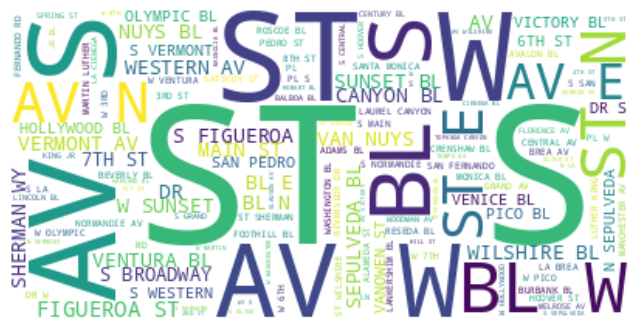

In [47]:
plt.figure(figsize = (8,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

***So crime occurs mostly on street (ST),Avenue (AV),Figueroa vermont avenue,seulveda are some common place where crime occurs repeatly.***

## Date Time:

#### Training data:

In [48]:
dt = pd.DataFrame()
dt['Timestamp'] = train_df['Date_Occurred'].copy()
dt['repTimestamp'] = train_df['Date_Reported'].copy()
dt['timestamp'] = pd.to_datetime(dt['Timestamp'],format='%m/%d/%Y %I:%M:%S %p')
dt['repTimestamp'] = pd.to_datetime(dt['repTimestamp'],format='%m/%d/%Y %I:%M:%S %p')
dt['Reported_Year'] = dt['repTimestamp'].dt.year
dt['Reported_Month'] = dt['repTimestamp'].dt.month
dt['Reported_Dayofweek'] = dt['repTimestamp'].dt.dayofweek

dt['Occurred_year'] = dt['timestamp'].dt.year
dt['Occurred_month'] = dt['timestamp'].dt.month
dt['Occurred_dayofweek'] = dt['timestamp'].dt.dayofweek

dt = dt.drop(columns = ['Timestamp', 'timestamp','repTimestamp'])

#### Testing data:

In [49]:
dtt = pd.DataFrame()
dtt['Timestamp'] = test_df['Date_Occurred'].copy()
dtt['repTimestamp'] = test_df['Date_Reported'].copy()
dtt['timestamp'] = pd.to_datetime(dtt['Timestamp'],format='%m/%d/%Y %I:%M:%S %p')
dtt['repTimestamp'] = pd.to_datetime(dtt['repTimestamp'],format='%m/%d/%Y %I:%M:%S %p')
dtt['Reported_Year'] = dtt['repTimestamp'].dt.year
dtt['Reported_Month'] = dtt['repTimestamp'].dt.month
dtt['Reported_Dayofweek'] = dtt['repTimestamp'].dt.dayofweek
dtt['Occurred_year'] = dtt['timestamp'].dt.year
dtt['Occurred_month'] = dtt['timestamp'].dt.month
dtt['Occurred_dayofweek'] = dtt['timestamp'].dt.dayofweek
dtt = dtt.drop(columns = ['Timestamp', 'timestamp','repTimestamp'])

In [50]:
dt['Occurred_month'].value_counts()

Occurred_month
1     1835
5     1755
6     1697
10    1685
7     1670
2     1663
8     1662
9     1643
12    1638
3     1630
4     1569
11    1553
Name: count, dtype: int64

In [51]:
dt['Reported_Year'].value_counts()

Reported_Year
2020    19177
2021      532
2022      176
2023      108
2024        7
Name: count, dtype: int64

In [52]:
dt['Reported_Month'].value_counts()

Reported_Month
1     1824
5     1754
2     1726
6     1725
7     1690
10    1681
9     1663
8     1634
3     1625
12    1587
11    1549
4     1542
Name: count, dtype: int64

***More crime reported in the month of January. Since in new year more crime happens.***

In [53]:
# concatinating training and dates column extracted from training data as well for testing data:
train_df = pd.concat([train_df,dt],axis=1)
test_df = pd.concat([test_df,dtt],axis=1)

In [54]:
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Weapon_Description,Status,Status_Description,Crime_Category,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_year,Occurred_month,Occurred_dayofweek
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,NaN,IC,Invest Cont,Property Crimes,2020,3,0,2020,3,4
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,2020,2,3,2020,2,3
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,NaN,IC,Invest Cont,Property Crimes,2020,8,4,2020,8,4
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,NaN,IC,Invest Cont,Property Crimes,2020,11,6,2020,11,4
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,2020,2,1,2020,2,1


In [55]:
train_df['Occurred_dayofweek'].value_counts()

Occurred_dayofweek
4    3010
5    2932
2    2909
3    2881
1    2782
6    2751
0    2735
Name: count, dtype: int64

***Friday there is more occurrence of crime.***

In [56]:
train_df['Reported_Dayofweek'].value_counts()

Reported_Dayofweek
0    3036
1    3023
2    3019
3    2946
4    2897
5    2599
6    2480
Name: count, dtype: int64

***On begining of the week monday tuesday wednesday people tends to report.***

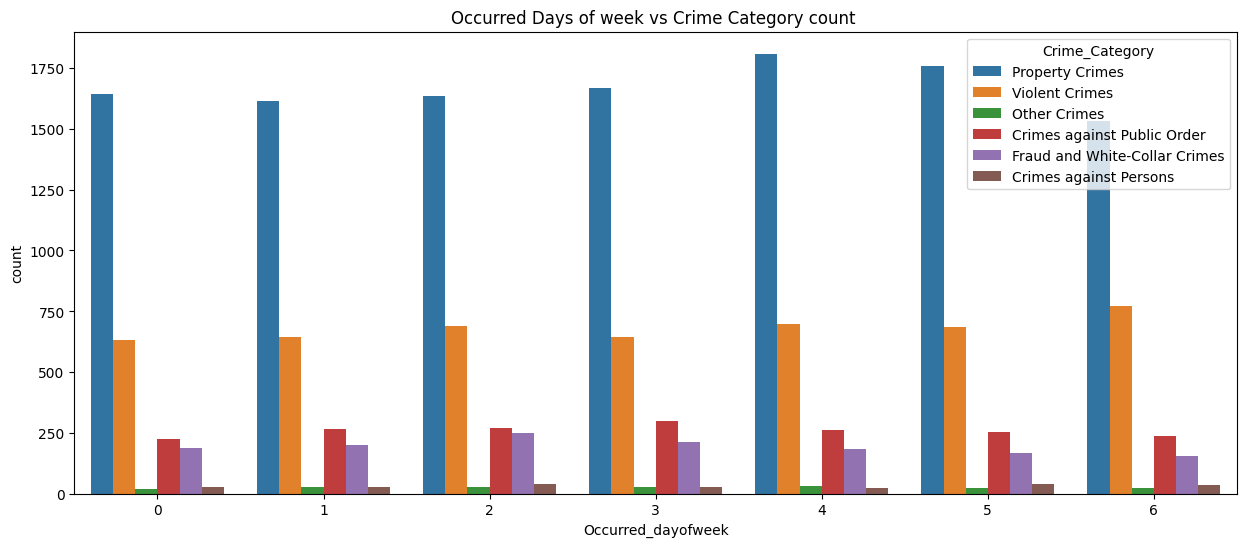

In [57]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Occurred_dayofweek', hue='Crime_Category', data=train_df)
plt.title('Occurred Days of week vs Crime Category count ')
plt.show()

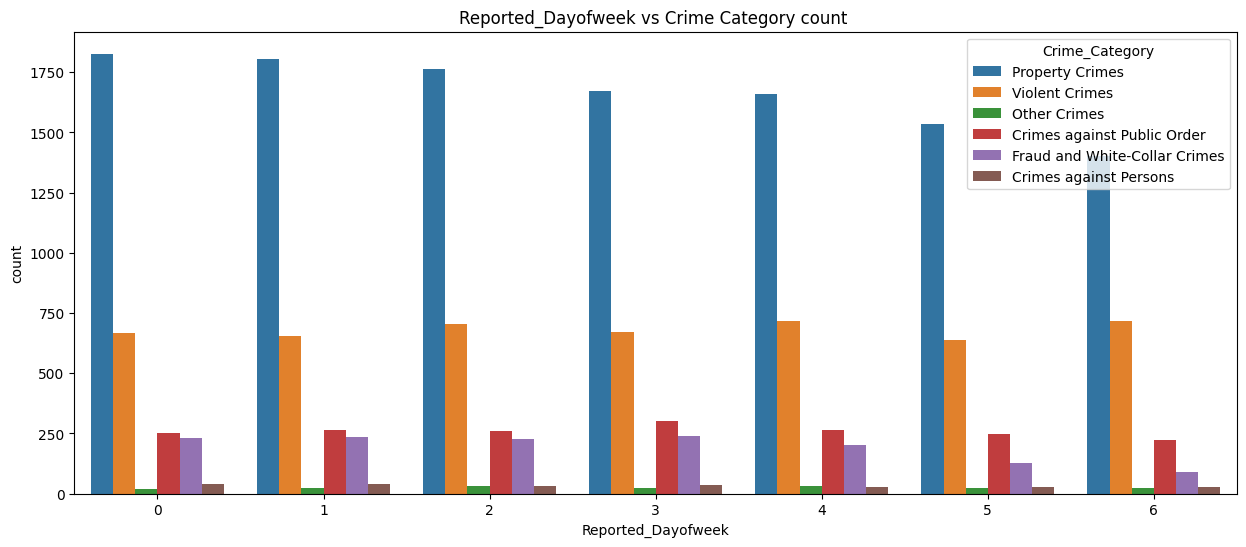

In [58]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Reported_Dayofweek', hue='Crime_Category', data=train_df)
plt.title('Reported_Dayofweek vs Crime Category count ')
plt.show()

In [59]:
train_df['Occurred_month'].value_counts()

Occurred_month
1     1835
5     1755
6     1697
10    1685
7     1670
2     1663
8     1662
9     1643
12    1638
3     1630
4     1569
11    1553
Name: count, dtype: int64

In [60]:
train_df['Reported_Month'].value_counts()

Reported_Month
1     1824
5     1754
2     1726
6     1725
7     1690
10    1681
9     1663
8     1634
3     1625
12    1587
11    1549
4     1542
Name: count, dtype: int64

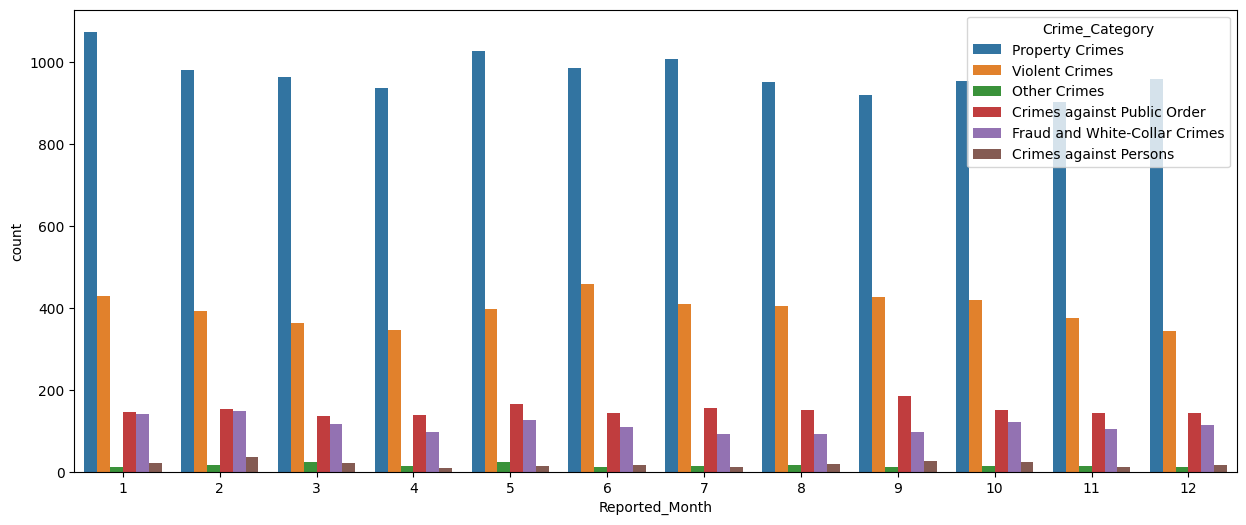

In [61]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Reported_Month', hue='Crime_Category', data=train_df)
plt.show()



***Similar pattern observed for all months.***

In [62]:
train_df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
Reported_Year                0
Reported_Month               0
Reported_Dayofweek           0
Occurred_year                0
Occurred_month               0
Occurred_dayofweek           0
dtype: int64

***dropping Cross street and weapon Used code since it has 83% and 62% null values respectively.***

# Data Preprocessing:

1. Cleaning the data
2. handling numerical and categorical attributes

#### unnecssary feature dropping

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [64]:
#dropping unnecessary columns
train_df = train_df.drop(columns=["Location","Cross_Street","Reporting_District_no","Area_Name","Premise_Description","Weapon_Used_Code","Weapon_Description","Status_Description","Occurred_year"])
test_df = test_df.drop(columns=["Location","Cross_Street","Reporting_District_no","Area_Name","Premise_Description","Weapon_Used_Code","Weapon_Description","Status_Description","Occurred_year"])

test_df.head()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek
0,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,IC,2020,3,1,3,1
1,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,1.0,0344 0394,26.0,M,B,502.0,IC,2020,6,0,4,5
2,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,IC,2020,8,4,8,3
3,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,1.0,NaN,0.0,NaN,NaN,108.0,IC,2020,12,2,12,3
4,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,2.0,1501,37.0,F,W,501.0,AO,2020,8,6,8,5


In [65]:
test_df.shape

(5000, 18)

In [66]:
train_df.shape

(20000, 19)

In [67]:
test_df.columns

Index(['Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status',
       'Reported_Year', 'Reported_Month', 'Reported_Dayofweek',
       'Occurred_month', 'Occurred_dayofweek'],
      dtype='object')

In [68]:
train_df.columns

Index(['Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status',
       'Crime_Category', 'Reported_Year', 'Reported_Month',
       'Reported_Dayofweek', 'Occurred_month', 'Occurred_dayofweek'],
      dtype='object')

In [69]:
train_df.isnull().sum()

Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Part 1-2                 0
Modus_Operandi        2741
Victim_Age               0
Victim_Sex            2624
Victim_Descent        2624
Premise_Code             0
Status                   0
Crime_Category           0
Reported_Year            0
Reported_Month           0
Reported_Dayofweek       0
Occurred_month           0
Occurred_dayofweek       0
dtype: int64

In [70]:
#Seperating Categorical and Numerical Columns
cat_cols = train_df.select_dtypes(include=["object"]).columns
cat_cols

Index(['Date_Reported', 'Date_Occurred', 'Modus_Operandi', 'Victim_Sex',
       'Victim_Descent', 'Status', 'Crime_Category'],
      dtype='object')

In [71]:
num_cols = train_df.select_dtypes(exclude=["object"]).columns
num_cols

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Reported_Year', 'Reported_Month',
       'Reported_Dayofweek', 'Occurred_month', 'Occurred_dayofweek'],
      dtype='object')

**Handling missing Values**

In [72]:
train_df.isnull().sum()

Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Part 1-2                 0
Modus_Operandi        2741
Victim_Age               0
Victim_Sex            2624
Victim_Descent        2624
Premise_Code             0
Status                   0
Crime_Category           0
Reported_Year            0
Reported_Month           0
Reported_Dayofweek       0
Occurred_month           0
Occurred_dayofweek       0
dtype: int64

In [73]:
# Latitude and Longitude has zero value as outliers.
# to find does latitude longitude value has 0 in it
train_df[train_df['Latitude'] == 0]

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Crime_Category,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek
344,0.0,0.0,06/29/2020 12:00:00 AM,06/29/2020 12:00:00 AM,1300.0,20.0,2.0,0212 0329 1822,19.0,X,X,203.0,IC,Property Crimes,2020,6,0,6,0
416,0.0,0.0,08/14/2020 12:00:00 AM,08/14/2020 12:00:00 AM,1245.0,19.0,2.0,NaN,62.0,M,O,503.0,IC,Crimes against Public Order,2020,8,4,8,4
430,0.0,0.0,06/21/2020 12:00:00 AM,06/21/2020 12:00:00 AM,400.0,1.0,2.0,0416 1822 2005,58.0,M,B,502.0,IC,Violent Crimes,2020,6,6,6,6
631,0.0,0.0,08/14/2020 12:00:00 AM,08/14/2020 12:00:00 AM,944.0,6.0,1.0,0329,49.0,M,W,102.0,IC,Property Crimes,2020,8,4,8,4
855,0.0,0.0,07/09/2020 12:00:00 AM,07/09/2020 12:00:00 AM,2208.0,12.0,2.0,2000 1243 1813 0913 1022 0448 0338 0416 0446 0329,36.0,F,B,501.0,IC,Violent Crimes,2020,7,3,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18838,0.0,0.0,12/04/2020 12:00:00 AM,12/04/2020 12:00:00 AM,1350.0,14.0,2.0,1822 0400 0445 2004,60.0,M,O,203.0,IC,Violent Crimes,2020,12,4,12,4
18995,0.0,0.0,12/18/2020 12:00:00 AM,12/18/2020 12:00:00 AM,1540.0,11.0,2.0,1501 2004,0.0,X,X,510.0,IC,Crimes against Public Order,2020,12,4,12,4
19181,0.0,0.0,05/13/2020 12:00:00 AM,05/13/2020 12:00:00 AM,900.0,7.0,2.0,2004 1501,49.0,F,B,505.0,IC,Crimes against Public Order,2020,5,2,5,2
19190,0.0,0.0,11/28/2020 12:00:00 AM,11/28/2020 12:00:00 AM,845.0,14.0,2.0,0444,48.0,M,H,212.0,IC,Violent Crimes,2020,11,5,11,5


In [74]:
# mode for latitude and longitude:
latitude_mode = train_df[train_df['Latitude'] != 0]['Latitude'].mode()[0]
latitude_modet = test_df[test_df['Latitude'] != 0]['Latitude'].mode()[0]
latitude_mode

34.2012

In [75]:
longitude_mode = train_df[train_df['Longitude'] != 0]['Longitude'].mode()[0]
longitude_modet = test_df[test_df['Longitude'] != 0]['Longitude'].mode()[0]
longitude_mode

-118.2739

In [76]:
# Replace zeros with the modes
train_df.loc[train_df['Latitude'] == 0, 'Latitude'] = latitude_mode
train_df.loc[train_df['Longitude'] == 0, 'Longitude'] = longitude_mode
test_df.loc[test_df['Latitude'] == 0, 'Latitude'] = latitude_modet
test_df.loc[test_df['Longitude'] == 0, 'Longitude'] = longitude_modet
train_df.head(345)


,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Crime_Category,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek
0,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1.0,0385,75.0,M,W,101.0,IC,Property Crimes,2020,3,0,3,4
1,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,IC,Property Crimes,2020,2,3,2,3
2,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,2.0,0329 1202,67.0,M,B,501.0,IC,Property Crimes,2020,8,4,8,4
3,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1.0,0329 1300,61.0,M,H,101.0,IC,Property Crimes,2020,11,6,11,4
4,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,IC,Property Crimes,2020,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,34.1868,-118.5229,08/16/2020 12:00:00 AM,08/16/2020 12:00:00 AM,1300.0,10.0,1.0,0416 1402 2004 0445 1213 0202 0319 0359 1822,53.0,M,W,101.0,AA,Violent Crimes,2020,8,6,8,6
341,34.1794,-118.4052,03/16/2020 12:00:00 AM,03/11/2020 12:00:00 AM,1900.0,15.0,1.0,0344 1300,31.0,M,O,101.0,IC,Property Crimes,2020,3,0,3,2
342,34.0446,-118.2450,11/06/2023 12:00:00 AM,01/01/2020 12:00:00 AM,1220.0,1.0,2.0,1822 1501,32.0,F,B,502.0,IC,Fraud and White-Collar Crimes,2023,11,0,1,2
343,34.1482,-118.4494,01/22/2021 12:00:00 AM,12/17/2020 12:00:00 AM,1338.0,9.0,1.0,0394 0344,18.0,M,B,119.0,IC,Property Crimes,2021,1,4,12,3


In [77]:
#checking for Nan values in Latitude and Longitude
train_df["Latitude"].isna().sum()
train_df["Longitude"].isna().sum()

0

In [78]:
test_df["Latitude"].isna().sum()
test_df["Longitude"].isna().sum()

0

**Handling irrelavant values**

In [79]:
# Victim Age -2 -1 (negative numbers)is irrelavant
train_df["Victim_Age"].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [80]:
# replacing with 0 for negative numbers both on training and testing dataframe:
train_df["Victim_Age"] = train_df["Victim_Age"].apply(lambda x: 0 if x < 0 else x)
test_df["Victim_Age"] = test_df["Victim_Age"].apply(lambda x: 0 if x < 0 else x)
train_df["Victim_Age"].value_counts()

Victim_Age
0.0     4834
30.0     448
31.0     446
26.0     442
29.0     425
        ... 
93.0       5
92.0       2
96.0       2
98.0       2
94.0       2
Name: count, Length: 98, dtype: int64

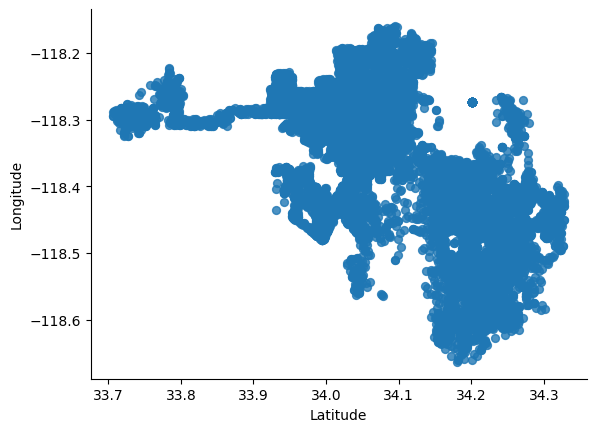

In [81]:
# Mapping Longitude and Latitude
from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Adding extra feature

In [82]:
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
train_df['Date_Occurred'] = pd.to_datetime(train_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
test_df['Date_Reported'] = pd.to_datetime(test_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
test_df['Date_Occurred'] = pd.to_datetime(test_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
# Calculate the difference in days
train_df['Days_takentoreport'] = (train_df['Date_Reported'] - train_df['Date_Occurred']).dt.days
test_df['Days_takentoreport'] = (test_df['Date_Reported'] - test_df['Date_Occurred']).dt.days
train_df.drop(columns=['Date_Reported', 'Date_Occurred'], inplace=True)
test_df.drop(columns=['Date_Reported', 'Date_Occurred'], inplace=True)
test_df.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
0,34.0128,-118.3045,2000.0,3.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,IC,2020,3,1,3,1,0
1,34.0726,-118.3029,1700.0,20.0,1.0,0344 0394,26.0,M,B,502.0,IC,2020,6,0,4,5,37
2,33.9348,-118.2695,900.0,18.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,IC,2020,8,4,8,3,1
3,34.0497,-118.3442,2200.0,7.0,1.0,NaN,0.0,NaN,NaN,108.0,IC,2020,12,2,12,3,20
4,34.1611,-118.3704,130.0,15.0,2.0,1501,37.0,F,W,501.0,AO,2020,8,6,8,5,1


In [83]:
(test_df.shape,train_df.shape)

((5000, 17), (20000, 18))

In [84]:
# Modus Operandi Has Null Values:
train_df["Modus_Operandi"].isna().sum()

2741

In [85]:
test_df['Modus_Operandi'].isna().sum()

684

In [86]:
# Step 1: Replace value of zero in place of null values in "Modus_Operandi"
mode_mo = "0000"
mode_mot ="0000"

# Step 2: Fill missing values in "Modus_Operandi" with mode_mo
train_df["Modus_Operandi"].fillna(mode_mo, inplace=True)
test_df["Modus_Operandi"].fillna(mode_mot, inplace=True)

# Step 3: Check the number of missing values in "Modus_Operandi" after filling
missing_values_count = train_df["Modus_Operandi"].isna().sum()
missing_value_count_t = test_df["Modus_Operandi"].isna().sum()

print("Number of missing values in 'Modus_Operandi' after filling:", missing_values_count)

Number of missing values in 'Modus_Operandi' after filling: 0


/tmp/ipykernel_33/3323660269.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Modus_Operandi"].fillna(mode_mo, inplace=True)
/tmp/ipykernel_33/3323660269.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [87]:
test_df['Modus_Operandi'].isna().sum()

0

In [88]:
test_df.shape

(5000, 17)

In [89]:
test_df['Modus_Operandi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Modus_Operandi
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


***Use TFidf vectorizer for modus operandi feature.***

In [90]:
# after cleaning info on train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            20000 non-null  float64
 1   Longitude           20000 non-null  float64
 2   Time_Occurred       20000 non-null  float64
 3   Area_ID             20000 non-null  float64
 4   Part 1-2            20000 non-null  float64
 5   Modus_Operandi      20000 non-null  object 
 6   Victim_Age          20000 non-null  float64
 7   Victim_Sex          17376 non-null  object 
 8   Victim_Descent      17376 non-null  object 
 9   Premise_Code        20000 non-null  float64
 10  Status              20000 non-null  object 
 11  Crime_Category      20000 non-null  object 
 12  Reported_Year       20000 non-null  int32  
 13  Reported_Month      20000 non-null  int32  
 14  Reported_Dayofweek  20000 non-null  int32  
 15  Occurred_month      20000 non-null  int32  
 16  Occu

In [91]:
train_df.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Crime_Category,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
0,34.1522,-118.3910,1800.0,15.0,1.0,0385,75.0,M,W,101.0,IC,Property Crimes,2020,3,0,3,4,3
1,34.0028,-118.2391,1345.0,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,IC,Property Crimes,2020,2,3,2,3,0
2,34.0111,-118.2653,605.0,13.0,2.0,0329 1202,67.0,M,B,501.0,IC,Property Crimes,2020,8,4,8,4,0
3,34.2953,-118.4590,1800.0,19.0,1.0,0329 1300,61.0,M,H,101.0,IC,Property Crimes,2020,11,6,11,4,2
4,33.9787,-118.2918,1130.0,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,IC,Property Crimes,2020,2,1,2,1,0


# Seperating Feature variables and target variables:

In [92]:
X = train_df.drop(columns=["Crime_Category"])
y = train_df["Crime_Category"]
X.head()


,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
0,34.1522,-118.3910,1800.0,15.0,1.0,0385,75.0,M,W,101.0,IC,2020,3,0,3,4,3
1,34.0028,-118.2391,1345.0,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,IC,2020,2,3,2,3,0
2,34.0111,-118.2653,605.0,13.0,2.0,0329 1202,67.0,M,B,501.0,IC,2020,8,4,8,4,0
3,34.2953,-118.4590,1800.0,19.0,1.0,0329 1300,61.0,M,H,101.0,IC,2020,11,6,11,4,2
4,33.9787,-118.2918,1130.0,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,IC,2020,2,1,2,1,0


In [93]:
y.head()

0    Property Crimes
1    Property Crimes
2    Property Crimes
3    Property Crimes
4    Property Crimes
Name: Crime_Category, dtype: object

## Training and Validation Set:

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_valid.shape

((16000, 17), (4000, 17))

In [95]:
X_train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
17815,34.2389,-118.4536,2030.0,19.0,2.0,0329,60.0,F,O,719.0,IC,2020,9,1,9,3,5
18370,34.2566,-118.5056,1.0,17.0,2.0,1822 0930,66.0,F,H,501.0,IC,2020,3,5,2,4,15
1379,33.9487,-118.2392,1730.0,18.0,2.0,0913 0444,52.0,M,H,121.0,AO,2020,5,5,5,5,0
14763,33.9638,-118.2629,1800.0,12.0,2.0,2000 0400 0416 0356 0913 1813 0421,25.0,F,H,122.0,AO,2020,7,0,7,0,0
7346,33.8420,-118.2992,800.0,5.0,1.0,0344 0385,32.0,F,O,119.0,IC,2020,3,1,3,0,8


In [96]:
train_df.isna().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex            2624
Victim_Descent        2624
Premise_Code             0
Status                   0
Crime_Category           0
Reported_Year            0
Reported_Month           0
Reported_Dayofweek       0
Occurred_month           0
Occurred_dayofweek       0
Days_takentoreport       0
dtype: int64

In [97]:
X_train.dtypes

Latitude              float64
Longitude             float64
Time_Occurred         float64
Area_ID               float64
Part 1-2              float64
Modus_Operandi         object
Victim_Age            float64
Victim_Sex             object
Victim_Descent         object
Premise_Code          float64
Status                 object
Reported_Year           int32
Reported_Month          int32
Reported_Dayofweek      int32
Occurred_month          int32
Occurred_dayofweek      int32
Days_takentoreport      int64
dtype: object

In [98]:
X_train['Victim_Descent'].value_counts()

Victim_Descent
H    4929
W    3415
B    2290
X    1472
O    1272
A     335
K      67
F      39
C      39
J      14
I      10
V       6
P       4
Z       3
U       2
G       1
Name: count, dtype: int64

In [99]:
X_valid['Victim_Descent'].value_counts()

Victim_Descent
H    1214
W     830
B     591
X     377
O     331
A      92
K      16
C      12
F       9
V       2
J       2
D       1
I       1
Name: count, dtype: int64

In [100]:
# values which are not in testing test is imputed with mode:
Des_mode = X_train['Victim_Descent'].mode()[0]
Des_mode

Des_Mode_t = test_df['Victim_Descent'].mode()[0]
Des_Mode_t

pre_mode2 = X_train['Premise_Code'].mode()[0]
pre_mode2

pre_mode2_t = test_df['Premise_Code'].mode()[0]
pre_mode2_t

day_mode = X_train['Days_takentoreport'].mode()[0]
day_mode

day_mode_t = test_df['Days_takentoreport'].mode()[0]
day_mode_t

unknown_categories = set(X_valid['Victim_Descent']) - set(X_train['Victim_Descent'])
if unknown_categories:
    X_valid['Victim_Descent'] = X_valid['Victim_Descent'].replace(list(unknown_categories), Des_mode)
unknown_categories_1t = set(test_df['Victim_Descent']) - set(X_train['Victim_Descent'])
if unknown_categories_1t:
    test_df['Victim_Descent'] = test_df['Victim_Descent'].replace(list(unknown_categories_1t), Des_Mode_t)

unknown_categories2 = set(X_valid['Premise_Code']) - set(X_train['Premise_Code'])
if unknown_categories2:
    X_valid['Premise_Code'] = X_valid['Premise_Code'].replace(list(unknown_categories2), pre_mode2)
unknown_categories2t = set(test_df['Premise_Code']) - set(X_train['Premise_Code'])
if unknown_categories2t:
    test_df['Premise_Code'] = test_df['Premise_Code'].replace(list(unknown_categories2t), pre_mode2_t)

unknown_categories3 = set(X_valid['Days_takentoreport']) - set(X_train['Days_takentoreport'])
if unknown_categories3:
    X_valid['Days_takentoreport'] = X_valid['Days_takentoreport'].replace(list(unknown_categories3),day_mode)
unknown_categories3t = set(test_df['Days_takentoreport']) - set(X_train['Days_takentoreport'])
if unknown_categories3t:
    test_df['Days_takentoreport'] = test_df['Days_takentoreport'].replace(list(unknown_categories3t),day_mode_t)

In [101]:
X_train['Modus_Operandi'].head()

17815                                  0329
18370                             1822 0930
1379                              0913 0444
14763    2000 0400 0416 0356 0913 1813 0421
7346                              0344 0385
Name: Modus_Operandi, dtype: object

In [102]:
# Assigning columns for imputation:
num_cols = ['Latitude','Longitude','Time_Occurred','Victim_Age']
Ord_cols = ['Victim_Descent','Premise_Code','Reported_Year','Reported_Month','Reported_Dayofweek','Occurred_month','Occurred_dayofweek','Days_takentoreport']
oh_cols = ['Area_ID','Part 1-2','Victim_Sex','Status']
cat_cols = ['Modus_Operandi']


# Preprocessing and Imputation:

In [103]:
# TargetLabel Encoding:
label_en = LabelEncoder()
label_en.fit_transform(y_train)

array([4, 2, 5, ..., 4, 5, 5])

In [104]:
y_train = pd.DataFrame(label_en.fit_transform(y_train), index=y_train.index)
y_valid = pd.DataFrame(label_en.transform(y_valid), index=y_valid.index)

In [105]:
y_train.head()

,0
17815,4
18370,2
1379,5
14763,5
7346,4


In [106]:
X_train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
17815,34.2389,-118.4536,2030.0,19.0,2.0,0329,60.0,F,O,719.0,IC,2020,9,1,9,3,5
18370,34.2566,-118.5056,1.0,17.0,2.0,1822 0930,66.0,F,H,501.0,IC,2020,3,5,2,4,15
1379,33.9487,-118.2392,1730.0,18.0,2.0,0913 0444,52.0,M,H,121.0,AO,2020,5,5,5,5,0
14763,33.9638,-118.2629,1800.0,12.0,2.0,2000 0400 0416 0356 0913 1813 0421,25.0,F,H,122.0,AO,2020,7,0,7,0,0
7346,33.8420,-118.2992,800.0,5.0,1.0,0344 0385,32.0,F,O,119.0,IC,2020,3,1,3,0,8


In [107]:
X_valid.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Year,Reported_Month,Reported_Dayofweek,Occurred_month,Occurred_dayofweek,Days_takentoreport
19134,34.2645,-118.5973,2000.0,17.0,1.0,0000,0.0,NaN,NaN,101.0,IC,2020,10,5,10,4,1
4981,34.0872,-118.2812,1700.0,2.0,1.0,0000,0.0,NaN,NaN,101.0,IC,2020,3,3,3,2,1
16643,34.1351,-118.2015,2310.0,11.0,1.0,1609 0344 0377 0913 1814,23.0,F,H,501.0,AO,2020,4,5,4,4,1
19117,33.9806,-118.3003,2350.0,12.0,2.0,0329 1307 1609,22.0,M,H,101.0,IC,2020,4,0,4,6,1
5306,34.2554,-118.5864,200.0,17.0,2.0,1402 1822 0935,58.0,F,W,101.0,AA,2020,7,4,7,2,2


#### pipeline for imputation and preprocessing:

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
num_numscols_pipeline = Pipeline([
    ("num_numscols_imputer", SimpleImputer(strategy="median")),
    ("num_numscols_scaler", StandardScaler())
])
oh_enco_pipeline = Pipeline([
    ("label_imputer", SimpleImputer(strategy="most_frequent")),
    ("label_encoder", OneHotEncoder(handle_unknown='ignore'))
])
ord_enco_pipeline = Pipeline([
    ("ord_imputer", SimpleImputer(strategy="most_frequent")),
    ("ord_encoder", OrdinalEncoder())
])


cat_pipeline = Pipeline([

    ("cat_encoder", TfidfVectorizer())

])



In [109]:
transformer1 = ColumnTransformer([
    ("num1", num_numscols_pipeline, num_cols),
    ("num2", oh_enco_pipeline, oh_cols),
    ("ordc", ord_enco_pipeline, Ord_cols),
    ("cat_oh", cat_pipeline, 'Modus_Operandi')


],remainder='passthrough'
)
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('num1',
                                 Pipeline(steps=[('num_numscols_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_numscols_scaler',
                                                  StandardScaler())]),
                                 ['Latitude', 'Longitude', 'Time_Occurred',
                                  'Victim_Age']),
                                ('num2',
                                 Pipeline(steps=[('label_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label_encoder',
                                                  OneHotEncoder(h...
                                  'Status']),
                                ('ordc',
                                 Pipeline(steps=[('ord_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord_encoder',
                                                  OrdinalEncoder())]),
                                 ['Victim_Descent', 'Premise_Code',
                                  'Reported_Year', 'Reported_Month',
                                  'Reported_Dayofweek', 'Occurred_month',
                                  'Occurred_dayofweek', 'Days_takentoreport']),
                                ('cat_oh',
                                 Pipeline(steps=[('cat_encoder',
                                                  TfidfVectorizer())]),
                                 'Modus_Operandi')])

In [110]:
pd.DataFrame(transformer1.fit_transform(X_train).toarray())

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,1.455049,-0.961983,1.049476,1.374360,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.611392,-1.465859,-2.094436,1.649582,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.108267,1.115538,0.584629,1.007397,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.974889,0.885887,0.693093,-0.231104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.050740,0.534142,-0.856395,0.089989,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.280621,0.452747,0.383196,0.640434,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,-0.327436,0.274452,0.383196,-0.231104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.259954,0.478910,-0.035166,-1.377863,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,-0.348635,0.869414,-1.894552,1.053267,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
pd.DataFrame(transformer1.transform(X_valid).toarray())

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,1.681172,-2.354426,1.002991,-1.377863,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.115094,0.708561,0.538145,-1.377863,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.538191,1.480849,1.483332,-0.322844,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.826496,0.523483,1.545312,-0.368715,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.600793,-2.248806,-1.786088,1.282619,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.287688,0.845189,1.002991,0.273471,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,-0.221441,0.607786,0.894527,-1.377863,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,-0.462580,0.811274,-1.321241,0.456952,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,1.589310,0.625228,0.538145,-0.231104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X_train_transformed = pd.DataFrame(transformer1.fit_transform(X_train).toarray())
X_valid_transformed = pd.DataFrame(transformer1.transform(X_valid).toarray())
X_test_transformed = pd.DataFrame(transformer1.transform(test_df).toarray())

#### testing for training and testing data shape after imputation and preprocessing remains equal: 

In [113]:
X_train_transformed.shape

(16000, 506)

In [114]:
X_train_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,1.455049,-0.961983,1.049476,1.374360,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.611392,-1.465859,-2.094436,1.649582,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.108267,1.115538,0.584629,1.007397,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.974889,0.885887,0.693093,-0.231104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.050740,0.534142,-0.856395,0.089989,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X_valid_transformed.shape

(4000, 506)

In [116]:
X_test_transformed.shape

(5000, 506)

# Feature Engineering:

#### Select K Best:

In [117]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(score_func = f_regression, k=200)
X_train_reduced_skb = skb.fit_transform(X_train_transformed,y_train)
X_valid_reduced_skb = skb.transform(X_valid_transformed)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Singular Value Decomposition:

In [118]:
#from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(n_components=200, random_state=42)
#X_train_reduced = svd.fit_transform(X_train_transformed)
#X_valid_reduced = svd.transform(X_valid_transformed)

In [119]:
X_train_reduced_skb.shape

(16000, 200)

In [120]:
X_valid_reduced_skb.shape

(4000, 200)

In [121]:
#transform to dataframe
X_train_final_skb = pd.DataFrame(X_train_reduced_skb)
X_valid_final_skb = pd.DataFrame(X_valid_reduced_skb)
X_train_final_skb.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.455049,-0.961983,1.049476,1.374360,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.611392,-1.465859,-2.094436,1.649582,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.108267,1.115538,0.584629,1.007397,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.974889,0.885887,0.693093,-0.231104,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.050740,0.534142,-0.856395,0.089989,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling:

## logistic Regression:

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
# lg = LogisticRegression(random_state=0,max_iter = 1000)
# lg.fit(X_train_final, y_train)

In [124]:
#y_pred_svd = lg.predict(X_valid_final)

In [125]:
#print(accuracy_score(y_valid, y_pred_svd))

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [127]:
# con_mat_lr = confusion_matrix(y_valid,y_pred_svd)
# con_display_lr = ConfusionMatrixDisplay(con_mat_lr)
# con_display_lr.plot()
# plt.title("Confusion Matrix for Logistic Regression")
# plt.show()

In [128]:
#print(classification_report(y_valid,y_pred_svd))

## LightGBM

In [129]:
import lightgbm as lgb
# lgbm = lgb.LGBMClassifier()
# lgbm.fit(X_train_final, y_train)


In [130]:
# y_pred_svd_lgbm = lgbm.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_lgbm))



In [131]:
# con_mat_lgbm = confusion_matrix(y_valid,y_pred_svd_lgbm)
# con_display_lgbm = ConfusionMatrixDisplay(con_mat_lgbm)
# con_display_lgbm.plot()
# plt.title("Confusion Matrix for LighgtGBM")
# plt.show()

In [132]:
#print(classification_report(y_valid,y_pred_svd_lgbm))

## XGB Classifier

In [133]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_final_skb, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [134]:
y_pred_svd_XG = xg.predict(X_valid_final_skb)
print(accuracy_score(y_valid, y_pred_svd_XG))

0.94975


In [135]:
from sklearn.metrics import classification_report

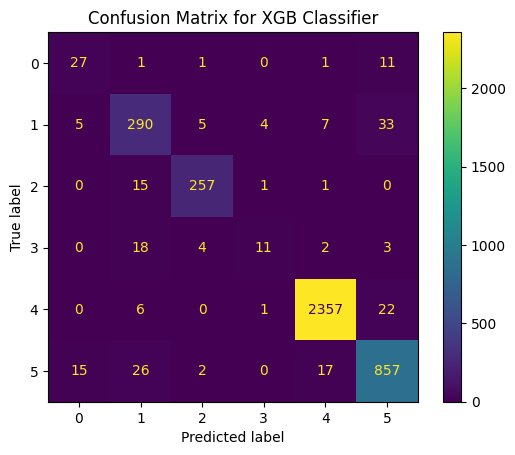

In [136]:
con_mat_XG = confusion_matrix(y_valid,y_pred_svd_XG)
con_display_XG = ConfusionMatrixDisplay(con_mat_XG)
con_display_XG.plot()
plt.title("Confusion Matrix for XGB Classifier")
plt.show()

In [137]:
print(classification_report(y_valid,y_pred_svd_XG))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61        41
           1       0.81      0.84      0.83       344
           2       0.96      0.94      0.95       274
           3       0.65      0.29      0.40        38
           4       0.99      0.99      0.99      2386
           5       0.93      0.93      0.93       917

    accuracy                           0.95      4000
   macro avg       0.82      0.78      0.78      4000
weighted avg       0.95      0.95      0.95      4000



## Decision Tree Classifier:

In [138]:
from sklearn.tree import DecisionTreeClassifier
# dtcl = DecisionTreeClassifier()
# dtcl.fit(X_train_final, y_train)

In [139]:
# y_pred_svd_dtcl = dtcl.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_dtcl))

In [140]:
# con_mat_dtcl = confusion_matrix(y_valid,y_pred_svd_dtcl)
# con_display_dtcl = ConfusionMatrixDisplay(con_mat_dtcl)
# con_display_dtcl.plot()
# plt.title("Confusion Matrix for Decision Tree Classifier")
# plt.show()

In [141]:
# print(classification_report(y_valid,y_pred_svd_dtcl))

## MLP Classifier:

In [142]:
from sklearn.neural_network import MLPClassifier
# mlpC = MLPClassifier(random_state=0)
# mlpC.fit(X_train_final, y_train)

In [143]:
# y_pred_svd_mlpC = mlpC.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_mlpC))

In [144]:
# con_mat_mlpC = confusion_matrix(y_valid,y_pred_svd_mlpC)
# con_display_mlpC = ConfusionMatrixDisplay(con_mat_mlpC)
# con_display_mlpC.plot()
# plt.title("Confusion Matrix for MLP Classifier")
# plt.show()

In [145]:
#print(classification_report(y_valid,y_pred_svd_mlpC))

## SVC

In [146]:
from sklearn.svm import SVC

In [147]:

# svc_C = SVC(random_state=0)
# svc_C.fit(X_train_final, y_train)


In [148]:
# y_pred_svd_svc_C = svc_C.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_svc_C))


In [149]:
#print(classification_report(y_valid,y_pred_svd_svc_C))


In [150]:
#svc_C.get_params()

## Random Forest:

In [151]:
from sklearn.ensemble import RandomForestClassifier



In [152]:
# rfc = RandomForestClassifier(random_state=0)
# rfc.fit(X_train_final, y_train)



In [153]:
# y_pred_svd_rfc = rfc.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_rfc))



In [154]:
#print(classification_report(y_valid,y_pred_svd_rfc))



In [155]:
# max depth of the tree
#rfc.get_params()

## KNN Neighbour:

In [156]:
from sklearn.neighbors import KNeighborsClassifier



In [157]:
# knnc = KNeighborsClassifier()
# knnc.fit(X_train_final, y_train)



In [158]:
# y_pred_svd_knnc = knnc.predict(X_valid_final)
# print(accuracy_score(y_valid, y_pred_svd_knnc))

## Comparing Models:

In [159]:
models = {
    'logisticRegression': LogisticRegression(random_state=0,max_iter=1000),
    'lightGBM': lgb.LGBMClassifier(),
    'XGB': XGBClassifier(),
    'Decision_Tree': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier()
}

score = {}

for name,modell in models.items():
    Model_pipeline = Pipeline([('preprocessing',transformer1),('feature_selection',SelectKBest(score_func = f_regression, k=200)),('model',modell)])
    Model_pipeline.fit(X_train,y_train)
    score[name] = Model_pipeline.score(X_valid,y_valid)
    print(f"-------- {name}--- done")
print(score)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-------- logisticRegression--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9776
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 133
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
-------- lightGBM--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------- XGB--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------- Decision_Tree--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-------- MLPClassifier--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------- SVC--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


-------- Random Forest--- done


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


-------- KNN--- done
{'logisticRegression': 0.92775, 'lightGBM': 0.95025, 'XGB': 0.94625, 'Decision_Tree': 0.9205, 'MLPClassifier': 0.9355, 'SVC': 0.645, 'Random Forest': 0.945, 'KNN': 0.69625}


In [160]:
score

{'logisticRegression': 0.92775,
 'lightGBM': 0.95025,
 'XGB': 0.94625,
 'Decision_Tree': 0.9205,
 'MLPClassifier': 0.9355,
 'SVC': 0.645,
 'Random Forest': 0.945,
 'KNN': 0.69625}

In [161]:
model_df = pd.DataFrame(list(score.items()), columns=['Model', 'Score'])

Text(0.5, 1.0, 'Model Scores')

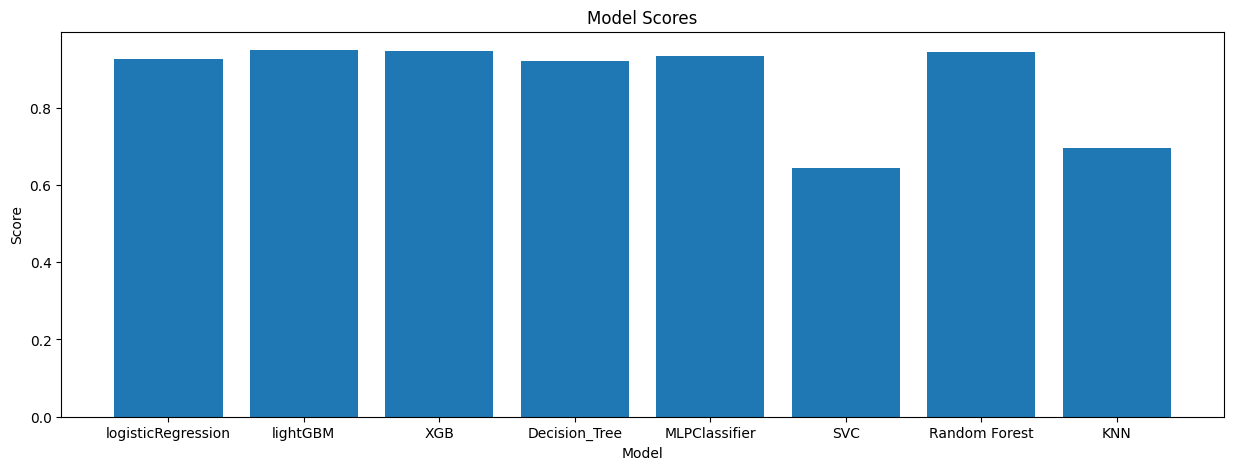

In [162]:
plt.figure(figsize=(15,5))
plt.bar(model_df['Model'], model_df['Score'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')

# Hyper Parameter Tuning

In [163]:
transformed_feature = Pipeline([('preprocessing',transformer1),('feature_selection',SelectKBest(score_func = f_regression, k=200))])

In [164]:
X_selected_transformed_train = transformed_feature.fit_transform(X_train,y_train)
X_selected_transformed_valid = transformed_feature.transform(X_valid)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
X_selected_transformed_train.shape

(16000, 200)

In [166]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV

In [167]:
classifiers = [
    {
         'name': 'SVM',
         'classifier': SVC(),
         'params': {
             'classifier__C': [0.1, 1, 10],
             'classifier__kernel': ['linear', 'rbf']
         }
     },
     {
         'name': 'Random Forest',
         'classifier': RandomForestClassifier(),
         'params': {
             'classifier__n_estimators': [10, 50],
             'classifier__max_depth': [None, 10, 20]
         }
     },
     {
         'name': 'KNN',
         'classifier': KNeighborsClassifier(),
         'params': {
             'classifier__n_neighbors': [5, 50, 100],
         }
     },
     {
        'name': 'XGBoost',
        'classifier': XGBClassifier(),
        'params':{
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_depth': [3, 5, 7],
        }
    },
    {
        'name': 'LightGBM',
        'classifier': lgb.LGBMClassifier(),
        'params':{
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_depth': [3, 5, 7],
        }
     
     },
    {
        'name': 'mlpClassifier',
        'classifier': MLPClassifier(),
        'params':{
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'classifier__activation': ['relu', 'tanh'],
        }
    },
     {
         'name': 'Logistic Regression',
         'classifier': LogisticRegression(random_state=0,max_iter=1000),
         'params': {
             'classifier__C': [0.1, 1, 10],
             'classifier__penalty': ['l2', 'l1']
         }
    }
 ]

# # Create a list to store the results
results = []

# # Loop through each classifier and perform GridSearchCV
for model in classifiers:

    pipeline = Pipeline([

        ('classifier', model['classifier'])
    ])

    grid_search = GridSearchCV(pipeline, param_grid=model['params'], cv=5, scoring='accuracy',verbose=1)
    grid_search.fit(X_selected_transformed_train, y_train)

    print({
        'name': model['name'],
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'name': 'SVM', 'best_params': {'classifier__C': 10, 'classifier__kernel': 'linear'}, 'best_score': 0.9404999999999999}
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

{'name': 'Random Forest', 'best_params': {'classifier__max_depth': None, 'classifier__n_estimators': 50}, 'best_score': 0.9409375000000001}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

{'name': 'KNN', 'best_params': {'classifier__n_neighbors': 5}, 'best_score': 0.69475}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'name': 'XGBoost', 'best_params': {'classifier__max_depth': 5, 'classifier__n_estimators': 100}, 'best_score': 0.9465}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8567
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.459988
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.695628
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.738702
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8547
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8540
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.738702
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8540
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.738702
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8540
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8547
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.738702
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8547
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] S

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8547
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] A

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] S

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8567
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.459988
[LightGBM] [Info] Start training from score -2.39158

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8567
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.459988
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.695628
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.390733
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.738702
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8547
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 130
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8540
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8544
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 129
[LightGBM] [Info] Start training from score -4.466768
[LightGBM] [Info] Start training from score -2.391587
[LightGBM] [Info] Start training from score -2.694471
[LightGBM] [Info] Start training from score -4.729813
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9776
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 133
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, bes

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

{'name': 'mlpClassifier', 'best_params': {'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (50,)}, 'best_score': 0.9396875}
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

{'name': 'Logistic Regression', 'best_params': {'classifier__C': 10, 'classifier__penalty': 'l2'}, 'best_score': 0.9333124999999999}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## HPT for XGB Classifier:

In [168]:
xg = XGBClassifier()
dt_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
      
}

grid_dt = GridSearchCV(xg,dt_params,cv=5,verbose=3,n_jobs=1)
grid_dt.fit(X_selected_transformed_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.909 total time=   0.4s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.913 total time=   0.4s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.906 total time=   0.4s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.917 total time=   0.4s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.913 total time=   0.4s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.941 total time=   1.4s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.940 total time=   1.5s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.943 total time=   1.4s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.944 total time=   1.5s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.942 total time=   1.5s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.946 total time=   2.6s
[CV 2/5] END .....max_depth=3, n_estimators=100;,

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [10, 50, 100]},
             verbose=3)

***Best model is XGB and LightGBM could be used since accuracy level is more than 94% hence choosing XGB model.***

In [169]:
# best parameter for xgboost
grid_dt.best_params_


{'max_depth': 5, 'n_estimators': 100}

In [170]:
# best score for xgboost
grid_dt.best_score_

0.9465

In [171]:
grid_dt.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [172]:
grid_dt.best_estimator_.score(X_selected_transformed_valid,y_valid)

0.9485

In [173]:
final_pipeline2 = Pipeline([('preprocessing',transformer1),('feature_eng',SelectKBest(score_func = f_regression, k=200)),('model',grid_dt.best_estimator_)])

# Model Pipeline:

### Evaluvation:

In [174]:
from sklearn.feature_selection import f_regression

In [175]:
model_pipelineF = Pipeline([('preprocessing',transformer1),('feature_selection',SelectKBest(score_func = f_regression, k=200)),('model',grid_dt.best_estimator_)])
model_pipelineF.fit(X_train,y_train)
y_pred_XG = model_pipelineF.predict(X_valid)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
accuracy_XG = model_pipelineF.score(X_valid,y_valid)

accuracy_XG

0.9485

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report


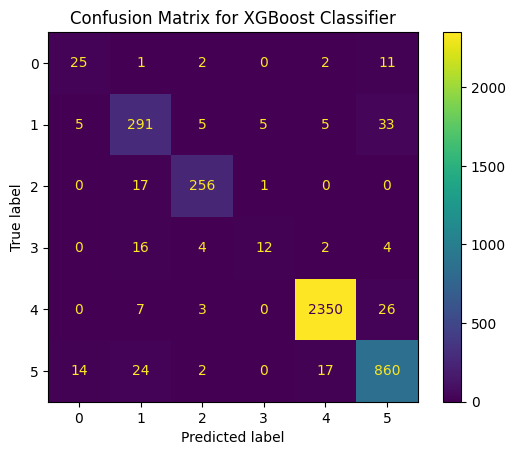

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        41
           1       0.82      0.85      0.83       344
           2       0.94      0.93      0.94       274
           3       0.67      0.32      0.43        38
           4       0.99      0.98      0.99      2386
           5       0.92      0.94      0.93       917

    accuracy                           0.95      4000
   macro avg       0.82      0.77      0.78      4000
weighted avg       0.95      0.95      0.95      4000



In [178]:
con_mat_XG = confusion_matrix(y_valid,y_pred_XG)
con_display_XG = ConfusionMatrixDisplay(con_mat_XG)
con_display_XG.plot()
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

print(classification_report(y_valid,y_pred_XG))

# Submission:

### Fit on total data:

In [179]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

fitting to whole training data

In [180]:
model_pipelineF.fit(X,y_encoded)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num1',
                                                  Pipeline(steps=[('num_numscols_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_numscols_scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Time_Occurred',
                                                   'Victim_Age']),
                                                 ('num2',
                                                  Pipeline(steps=[('label_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [181]:
y_pred = model_pipelineF.predict(test_df)
y_pred

array([5, 4, 2, ..., 5, 5, 4])

In [182]:
#decoding
y_pred = le.inverse_transform(y_pred)
y_pred

array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [183]:
submission = pd.DataFrame({"ID": np.arange(1, 5001),
                           "Crime_Category": y_pred,
                          }
                         )
submission.to_csv('submission.csv', index=False)